In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

plt.rc('font',family='serif')

In [32]:
d=1000 # d: dimension
n=2000 # n: number of points
A = np.random.normal(size=(n,d)) / np.sqrt(n) # matrix containing the data points
y  = np.random.normal(size=n)

x0 = np.random.normal(size=d)
y = A @ x0

lambd= 1e-6
# lambd= 10

We consider the Ridge cost function:
$$
f(x) = \frac{1}{2} \|Ax-y\|^2 + \frac{\lambda}{2} \|x\|^2,
$$
where $\lambda > 0$ is some regularization parameter that we take equal to $1$. The matrix $A$ and the vector $y$ are defined in the cell above.

**(a)** Show that $f$ is can be written in the format the function $f$ of Problem 12.2, for some $M \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$ and $c \in \mathbb{R}$. Compute numerically the values of $L$ and $\mu$. Plot the eigenvalues of $H_f(x)$ using an histogram.

In [41]:
M = A.T @ A + lambd * np.eye(d)
b = A.T @ y

eigv = np.linalg.eigh(M)[0]
L = np.max(eigv)
mu = np.min(eigv)

**(b)** Implement gradient descent with constant step-size $\beta = 1/L$ (as in Problem 12.2), with random initial position $x_0$. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$.

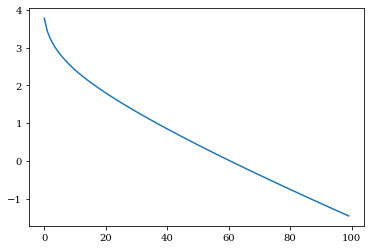

In [43]:
def gradient(x):
    return M @ x - b

xstar = np.linalg.pinv(A.T @ A + lambd * np.eye(d)) @ A.T @ y
def compute_error(x):
    return np.log(np.linalg.norm(x - xstar))

    # GRADIENT DESCENT
N=100
time = np.array(range(N))
start = np.random.randn(d)
position = copy.copy(start)
trajectory = np.zeros(shape=(d,N))
error = np.zeros(N)
alpha = 1/L


for i in range(N):
    trajectory[:,i] = position
    error[i] = compute_error(position)
    
    position = position - alpha * gradient(position)

plt.plot(error)

In [39]:
xstar = np.linalg.pinv(A.T @ A + lambd * np.eye(d)) @ A.T @ y
x0 = position
xstar - x0
np.log(np.linalg.norm(x0 - xstar))

3.5520388328668933

**(c)** Implement gradient descent with momentum, with the same parameters as in Problem 12.4. Plot the log-error $\log (\|x_t - x_*\|)$ as a function of $t$, on the same plot than the log-error of gradient descent without momentum.
On the same plot, plot also the lines of equation
$$
y = \log(1-\mu / L) \times t \qquad \text{and} \qquad
y = \log\Big(\frac{\sqrt{L}-\sqrt{\mu}}{\sqrt{L}+\sqrt{\mu}}\Big) \times t.
$$

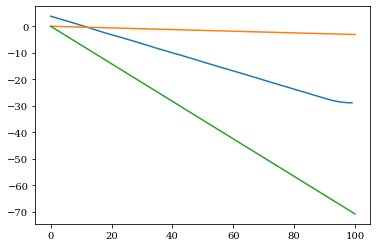

In [46]:
N=100
time = np.array(range(N))
position = copy.copy(start)
trajectory = np.zeros(shape=(d,N))
error = np.zeros(N)

v = np.zeros(d)

alpha = 4 / np.square(np.sqrt(L) + np.sqrt(mu))
beta = np.square((np.sqrt(L)-np.sqrt(mu))/ (np.sqrt(L) + np.sqrt(mu)))


for i in range(N):
    trajectory[:,i] = position
    error[i] = compute_error(position)
    
    v = - alpha * gradient(position) + beta * v
    
    position = position + v

plt.plot(error)
t = np.linspace(0,N,2)
plt.plot(t, np.log(1 - mu/L)* t)
plt.plot(t, np.log(beta) * t)

    